<a href="https://colab.research.google.com/github/MithunKiniStar/Customer-Churn/blob/main/Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Telecom Customer Churn:

The data set includes information about:


*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines,   internet, online * security, online backup, device protection, tech support, and streaming TV and movies.
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents
*   Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)

Dataset taken from Kaggle: https://www.kaggle.com/blastchar/telco-customer-chur

In [37]:
# Importing  packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [84]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
# Features types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In the dataset, we notice that some of the independent features are numerical and most of feature are categorical feature.

In [86]:
# Total charges are in object dtype so convert into Numerical feature 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

Separating Numerical and Categorical feature

In [87]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges'}


In [88]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'Dependents', 'PhoneService', 'gender', 'Churn', 'InternetService', 'PaymentMethod', 'customerID', 'StreamingTV', 'OnlineBackup', 'PaperlessBilling', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'Contract', 'Partner', 'MultipleLines'}


EDA

Check for imbalanced dataset

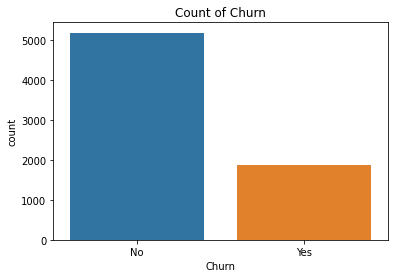

In [43]:
# plotting with target feature
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [89]:
l1 = data.loc[data['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn'])}")
print(data.Churn.value_counts())

Pecentage of Left: 0.2653698707936959
No     5174
Yes    1869
Name: Churn, dtype: int64


Its a 26:74 ratio. Hence its an imbalanced dataset.

In [45]:
### Loss of amount from customer churn
loss = []
for values in data.loc[data['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

2862927.0


We have lost arround $2862927 due to customer churn

Text(0.5, 1.0, '% of Senior Citizens')

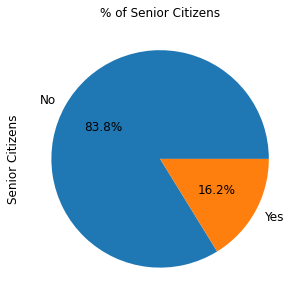

In [46]:
# pie chart for Count of Senior citizens
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Only 16.2% customers are senior citizons but remaining 83.8% customers are young

Univariate Analysis:


<Figure size 432x288 with 0 Axes>

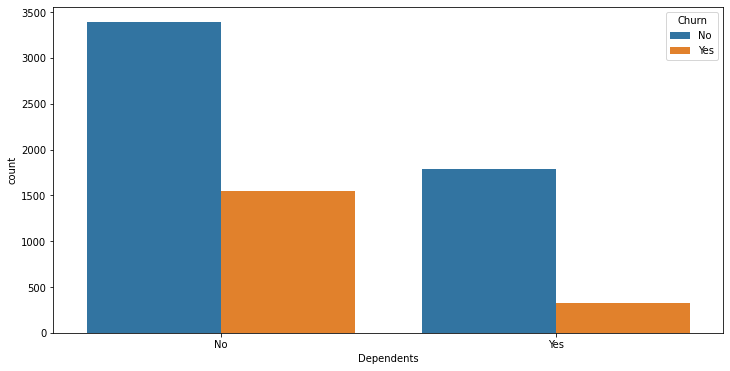

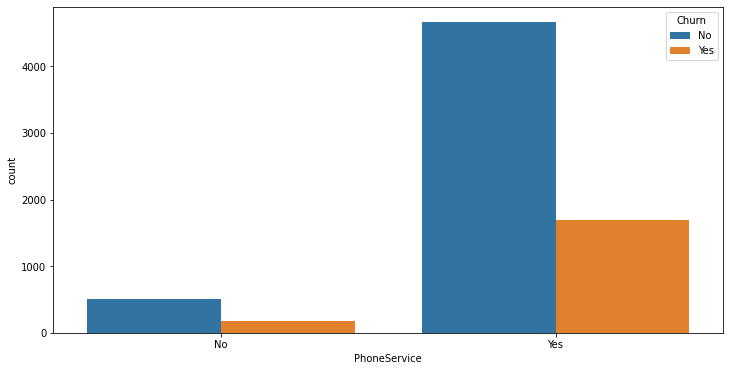

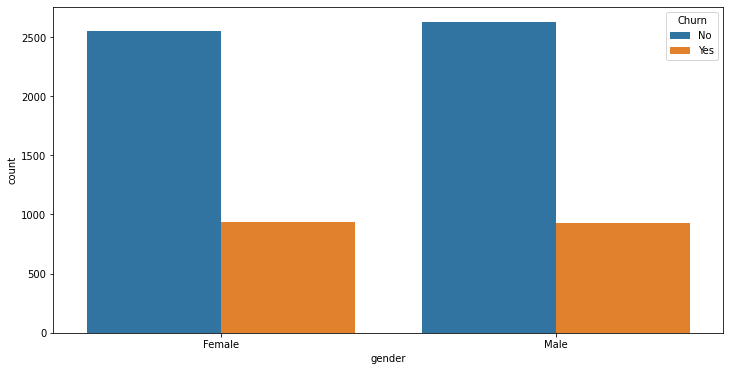

<Figure size 432x288 with 0 Axes>

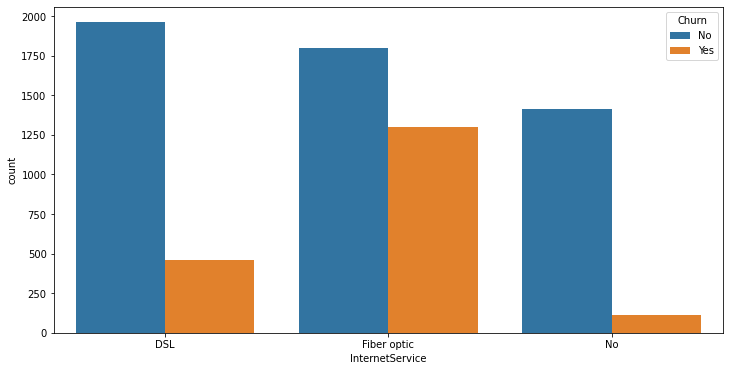

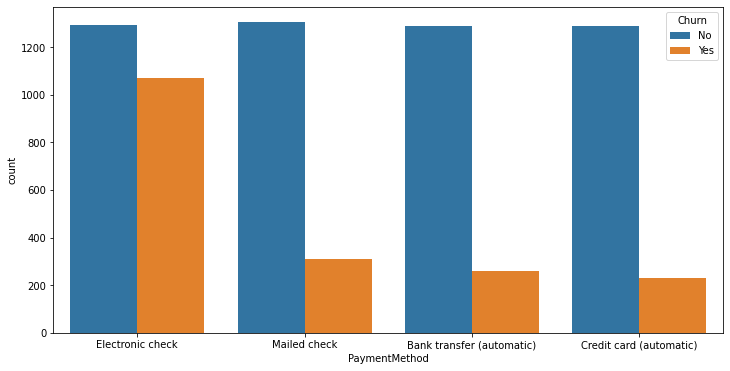

<Figure size 432x288 with 0 Axes>

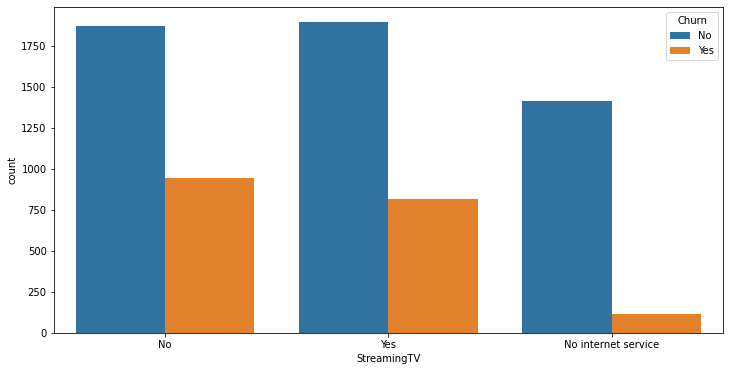

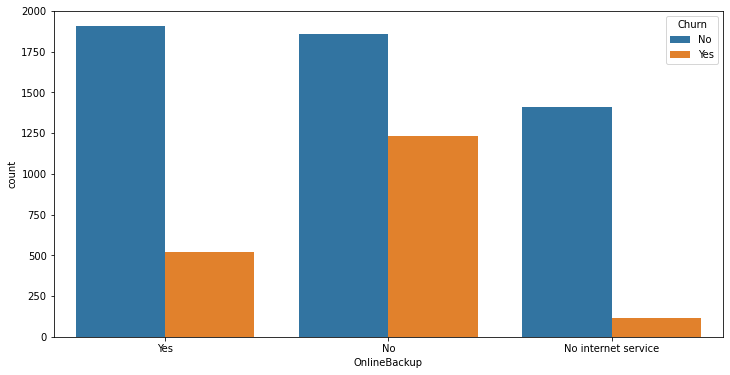

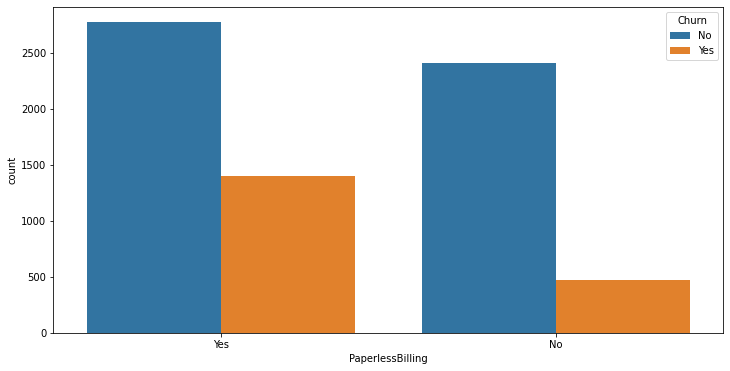

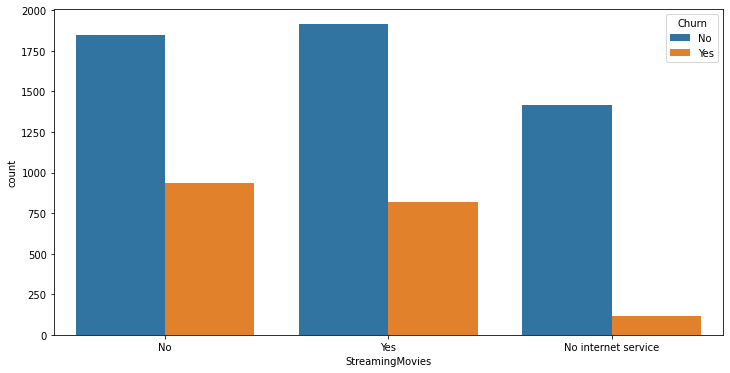

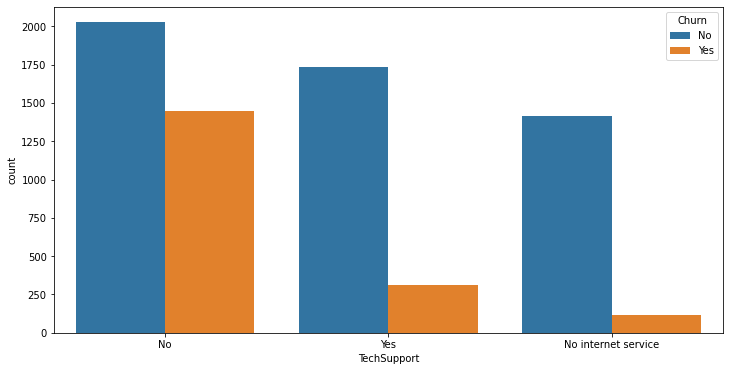

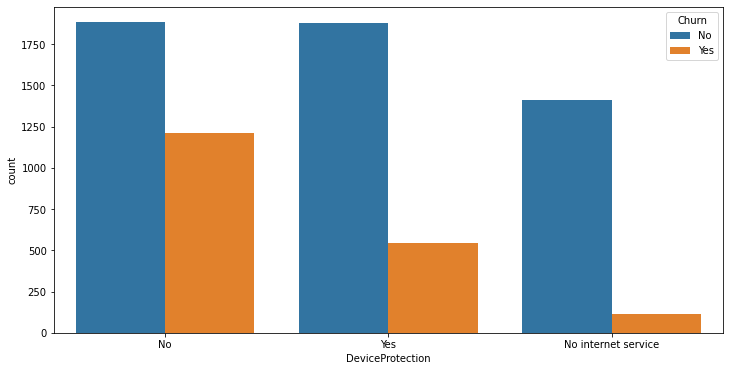

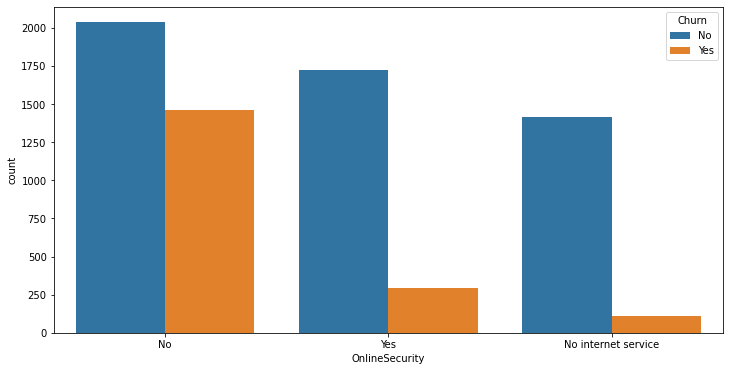

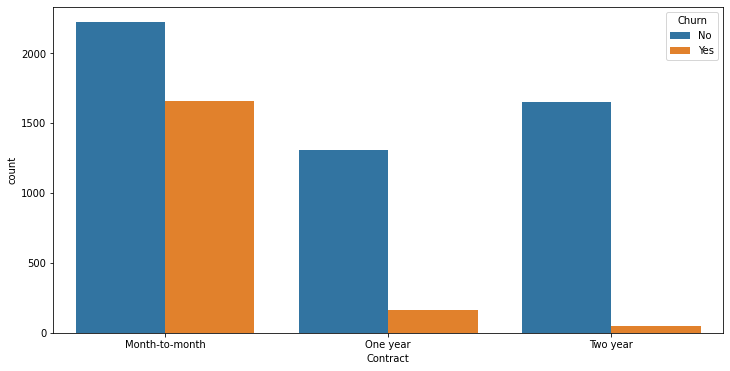

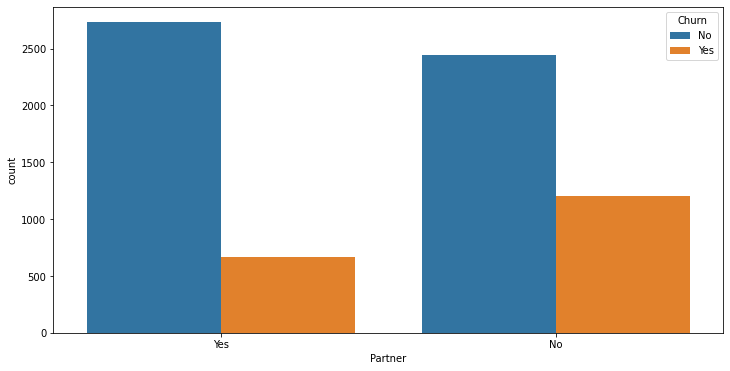

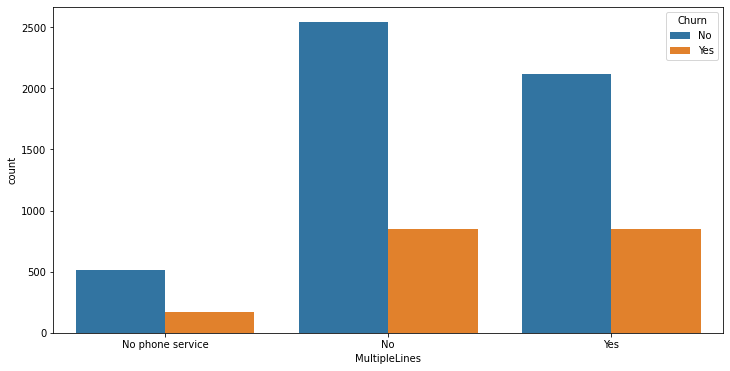

In [47]:
for i, feature in enumerate(categorical_feature):
    if feature != 'TotalCharges' and feature != 'customerID' and feature != 'Churn':
        plt.figure(i)
        plt.figure(figsize=(12,6))
        sns.countplot(data=data, x=feature, hue='Churn')
plt.show()


Following are the features which contribute more for customer churn


*   Dependents : No
*   Internet Service : Fiber Optic
*   Online Backup : No
*   Tech support : No
*   Device Protection : No
*   Online Security : No
*   Contract : One Year






Data Cleaning:

In [90]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Handling missing data

In [91]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [92]:
# replace NaN values with mean value
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.median())

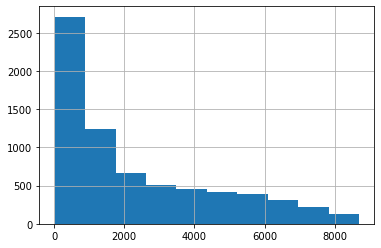

In [17]:
data.TotalCharges.hist()

Perform the Feature Encoding techiniques to convert the categorical feature into numerical feature

In [74]:
print(categorical_feature)

{'Dependents', 'PhoneService', 'gender', 'Churn', 'InternetService', 'PaymentMethod', 'customerID', 'StreamingTV', 'OnlineBackup', 'PaperlessBilling', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'Contract', 'Partner', 'MultipleLines'}


Seperate Target Variables

In [93]:
target = data['Churn']
target.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [124]:
X_enc = pd.get_dummies(data, columns=['Dependents', 'PhoneService', 'gender', 'InternetService', 'PaymentMethod', 'StreamingTV', 'OnlineBackup', 'PaperlessBilling', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'Contract', 'Partner', 'MultipleLines'])
mergedata = data.drop(['Dependents', 'PhoneService', 'gender', 'InternetService', 'PaymentMethod', 'StreamingTV', 'OnlineBackup', 'PaperlessBilling', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'Contract', 'Partner', 'MultipleLines'],axis=1)
final_data = pd.merge(mergedata,X_enc, on=['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn'])

In [126]:
#final_data.drop(columns=['Churn'], inplace=True, axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   object 
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  gender_Female                            7043 no

In [127]:
encoder = LabelEncoder()
target = encoder.fit_transform(target)
target = pd.DataFrame(target, columns=['Churn'])
target.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [135]:
final_data.drop(columns=['Churn'],axis=1,inplace=True)
final_data = pd.concat([final_data,pd.DataFrame(target)], axis=1)

In [136]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Dependents_No                            7043 non-null   uint8  
 6   Dependents_Yes                           7043 non-null   uint8  
 7   PhoneService_No                          7043 non-null   uint8  
 8   PhoneService_Yes                         7043 non-null   uint8  
 9   gender_Female                            7043 non-null   uint8  
 10  gender_Male                              7043 no

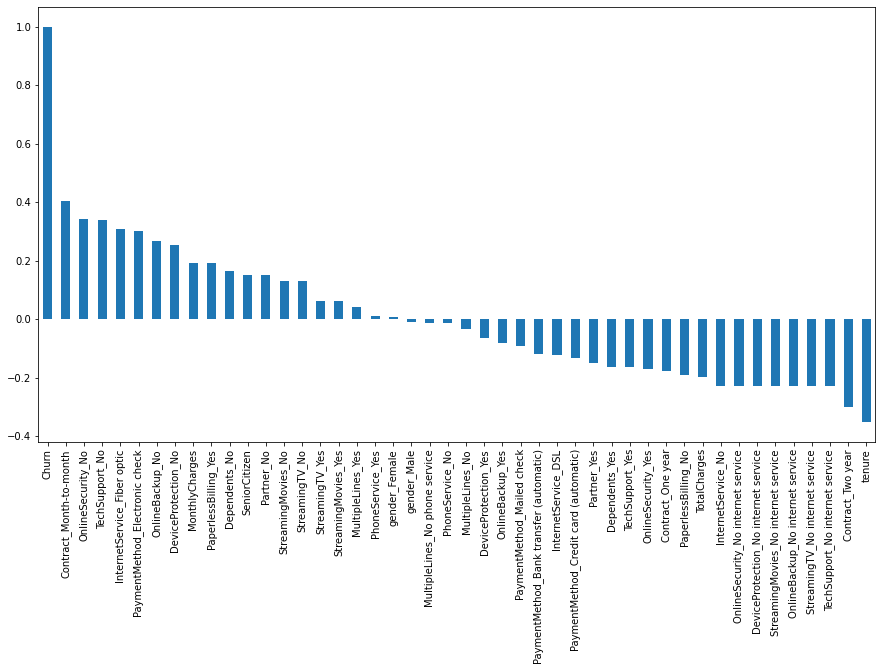

In [137]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
final_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [108]:
# Finding the correlation between the independent and dependent feature
# plt.figure(figsize=(20, 20))
# sns.heatmap(final_data.corr(), annot=True)

Splitting the dataset into train and test

In [143]:
# splitting dataset into dependent and independent feature
X = final_data.drop(columns=['Churn','customerID'])
y = final_data['Churn']

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Dependents_No                            7043 non-null   uint8  
 5   Dependents_Yes                           7043 non-null   uint8  
 6   PhoneService_No                          7043 non-null   uint8  
 7   PhoneService_Yes                         7043 non-null   uint8  
 8   gender_Female                            7043 non-null   uint8  
 9   gender_Male                              7043 non-null   uint8  
 10  InternetService_DSL                      7043 no

**Feature Selection**

From sklearn using feature selection modules importing the SelectKBest to select the important feature

In [140]:
# selects the feature which has more correlation
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)


In [146]:
selection.get_support()

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False])

According to the feature selection, we selects the 10 out of 53 features. these are the 10 features are selected [ tenure, InternetService_Fiber optic, PaymentMethod_Electronic check, OnlineBackup_No, TechSupport_No, DeviceProtection_No, OnlineSecurity_No ,OnlineSecurity_No internet service, Contract_Month-to-month]



In [147]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [148]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Its an imbalanced dataset

Apply machine learning algorithm:


In [149]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7771469127040455
Confusion matrix :
 [[923 183]
 [131 172]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1106
           1       0.48      0.57      0.52       303

    accuracy                           0.78      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.79      0.78      0.78      1409



In [150]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.7828246983676366
Confusion matrix :
 [[936 188]
 [118 167]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1124
           1       0.47      0.59      0.52       285

    accuracy                           0.78      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.80      0.78      0.79      1409



Handling imbalance dataset using SMOTEENN :

In [151]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4120, 1: 1514})
The number of classes after fit Counter({1: 2454, 0: 2135})


In [152]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [153]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9422657952069716
Confusion matrix :
 [[400  19]
 [ 34 465]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       419
           1       0.96      0.93      0.95       499

    accuracy                           0.94       918
   macro avg       0.94      0.94      0.94       918
weighted avg       0.94      0.94      0.94       918



In [154]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9455337690631809
Confusion matrix :
 [[403  19]
 [ 31 465]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       422
           1       0.96      0.94      0.95       496

    accuracy                           0.95       918
   macro avg       0.94      0.95      0.95       918
weighted avg       0.95      0.95      0.95       918



In [155]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9509803921568627
Confusion matrix :
 [[410  21]
 [ 24 463]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       431
           1       0.96      0.95      0.95       487

    accuracy                           0.95       918
   macro avg       0.95      0.95      0.95       918
weighted avg       0.95      0.95      0.95       918



After using SMOOTEENN methods to perform over sampling and down sampling with edited nearest neighbours its observed that we get bet accuraccy and TP FP ratio. Also since TP FP ratio is better in GradientBoostClassifier so performing HyperParameter Tunning for this model.



In [156]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [158]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=10, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=mae, learning_rate=0.3, loss=deviance, max_depth=19, max_leaf_nodes=9, min_samples_leaf=7, min_samples_split=3, n_estimators=150;, score=0.898 total time= 1.1min
[CV 2/5] END criterion=mae, learning_rate=0.3, loss=deviance, max_depth=19, max_leaf_nodes=9, min_samples_leaf=7, min_samples_split=3, n_estimators=150;, score=0.888 total time= 1.1min
[CV 3/5] END criterion=mae, learning_rate=0.3, loss=deviance, max_depth=19, max_leaf_nodes=9, min_samples_leaf=7, min_samples_split=3, n_estimators=150;, score=0.902 total time=  56.9s
[CV 4/5] END criterion=mae, learning_rate=0.3, loss=deviance, max_depth=19, max_leaf_nodes=9, min_samples_leaf=7, min_samples_split=3, n_estimators=150;, score=0.911 total time= 1.0min
[CV 5/5] END criterion=mae, learning_rate=0.3, loss=deviance, max_depth=19, max_leaf_nodes=9, min_samples_leaf=7, min_samples_split=3, n_estimators=150;, score=0.888 total time=  58.9s
[CV 1/5] END c

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 

In [159]:
gbc_optm.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_depth=19, max_leaf_nodes=15,
                           min_samples_leaf=9, min_samples_split=8,
                           n_estimators=300)

In [160]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=15, min_samples_leaf=9,
                           min_samples_split=8, n_estimators=300)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9629629629629629
Confusion matrix :
 [[414  14]
 [ 20 470]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       428
           1       0.97      0.96      0.97       490

    accuracy                           0.96       918
   macro avg       0.96      0.96      0.96       918
weighted avg       0.96      0.96      0.96       918



In [161]:
gbc_tunning.score(X_test_sap, y_test_sap)

0.9629629629629629

In [178]:
test_input = X_test_sap.iloc[[0]]
test_input.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,PaperlessBilling_No,PaperlessBilling_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Partner_No,Partner_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
1676,0,34,19.7,675.6,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0


In [182]:
single = gbc_tunning.predict(test_input)


In [180]:
print(single)

[0]


In [185]:
if single == 1:
    print("This Customer is likely to be Churned!")
else:
    print("This Customer is likely to be Continue!")

This Customer is likely to be Continue!
